In [94]:
import pandas as pd
import numpy as np

In [95]:
df=pd.read_csv('Data_from.csv',encoding='cp1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4603,ham,THANX 4 PUTTIN DA FONE DOWN ON ME!!,NaN,NaN,NaN
3742,ham,"Nah, Wednesday. When should I bring the mini c...",NaN,NaN,NaN
1957,ham,Take something for pain. If it moves however t...,NaN,NaN,NaN
1400,ham,"No, I decided that only people who care about ...",NaN,NaN,NaN
5034,ham,How many times i told in the stage all use to ...,NaN,NaN,NaN


Data Claning

In [96]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [97]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [98]:
df.sample(5)


,v1,v2
4807,ham,What's up my own oga. Left my phone at home an...
4940,ham,Omg you can make a wedding chapel in frontierv...
429,ham,I wnt to buy a BMW car urgently..its vry urgen...
1712,ham,o turns out i had stereo love on mi phone unde...
2588,ham,My superior telling that friday is leave for a...


In [99]:
# Rename columns
df.rename(columns={'v1':'label','v2':'text'}, inplace=True)
df.sample(5)

,label,text
4163,ham,"Its ok, called mom instead have fun"
1745,ham,Iï¿½ï¿½m cool ta luv but v.tired 2 cause i hav...
3131,ham,I've been barred from all B and Q stores for l...
1277,ham,Dont put your phone on silent mode ok
4426,ham,So what did the bank say about the money?


In [100]:
# Check for null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [101]:
# Check for duplicates
df.duplicated().sum()

np.int64(403)

In [102]:
df.drop_duplicates(inplace=True,keep='first')

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [104]:
df['label']=le.fit_transform(df['label'])
df.sample(5)

,label,text
5380,0,Its sunny in california. The weather's just cool
2860,0,I am not at all happy with what you saying or ...
3681,0,"Hello, hello, hi lou sorry it took so long 2 r..."
3421,1,Freemsg: 1-month unlimited free calls! Activat...
5023,0,Where you. What happen


In [105]:
df.shape

(5169, 2)

<h1> EDA

In [106]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [107]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

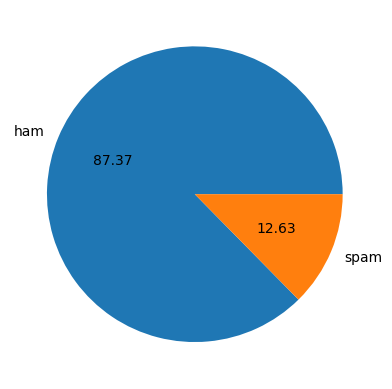

In [108]:
# %pip install matplotlib
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [109]:
# Data is imbalanced, so we will use SMOTE to balance it
# %pip install imblearn
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
# number odf characters in each message
df['text'].apply(len)


0       111
1        29
2       155
3        49
4        61
       ... 
5567    162
5568     39
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [111]:
df['num_characters'] = df['text'].apply(len)

In [112]:
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
# Download the punkt resource and ensure punkt_tab is available
nltk.download('punkt')
nltk.download('punkt_tab')

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [114]:
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [115]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [116]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [117]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.00000,5169.000000,5169.000000
mean,79.23196,18.455794,1.965564
std,58.33921,13.324758,1.448541
min,2.00000,1.000000,1.000000
25%,36.00000,9.000000,1.000000
50%,61.00000,15.000000,1.000000
75%,117.00000,26.000000,2.000000
max,910.00000,220.000000,38.000000


In [118]:
# ham 
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [119]:
# spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.346095,27.667688,2.970904
std,30.261787,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

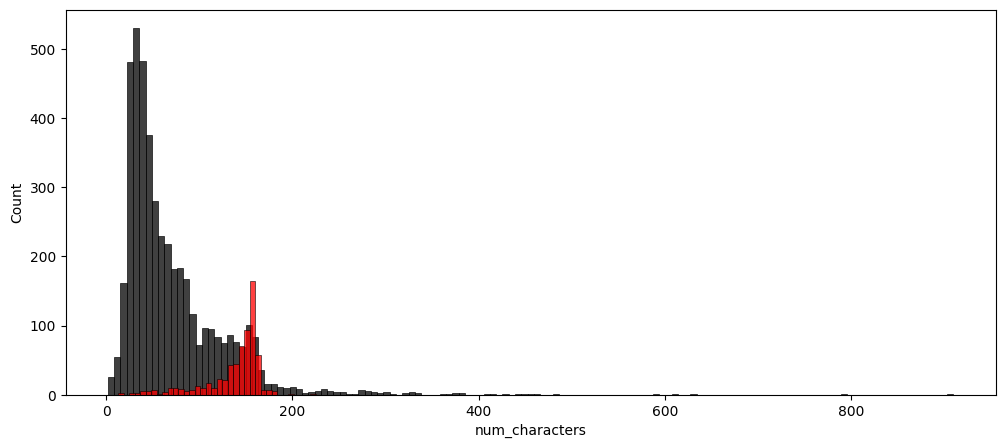

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.histplot(df[df['label']==0]['num_characters'],color='black', label='ham')
sns.histplot(df[df['label']==1]['num_characters'], color='red', label='spam')

<Axes: xlabel='num_words', ylabel='Count'>

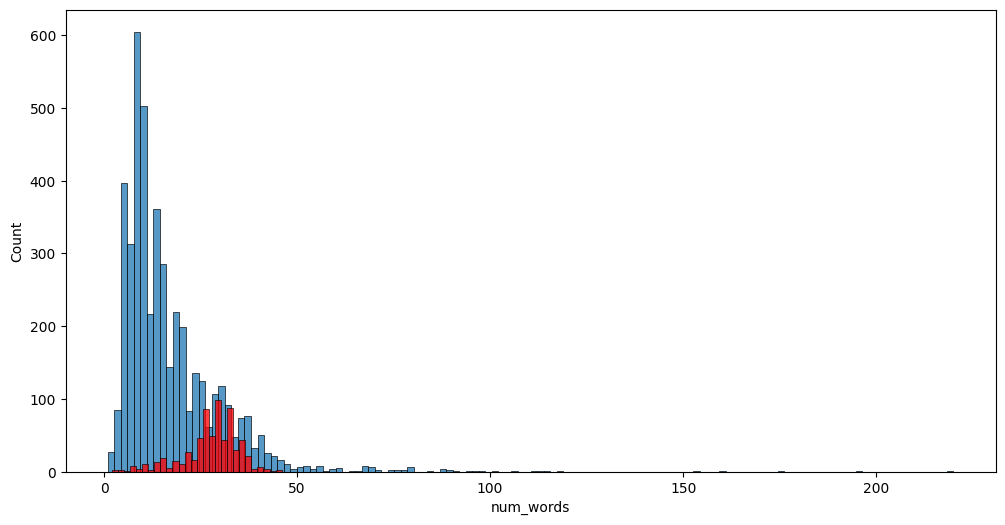

In [121]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

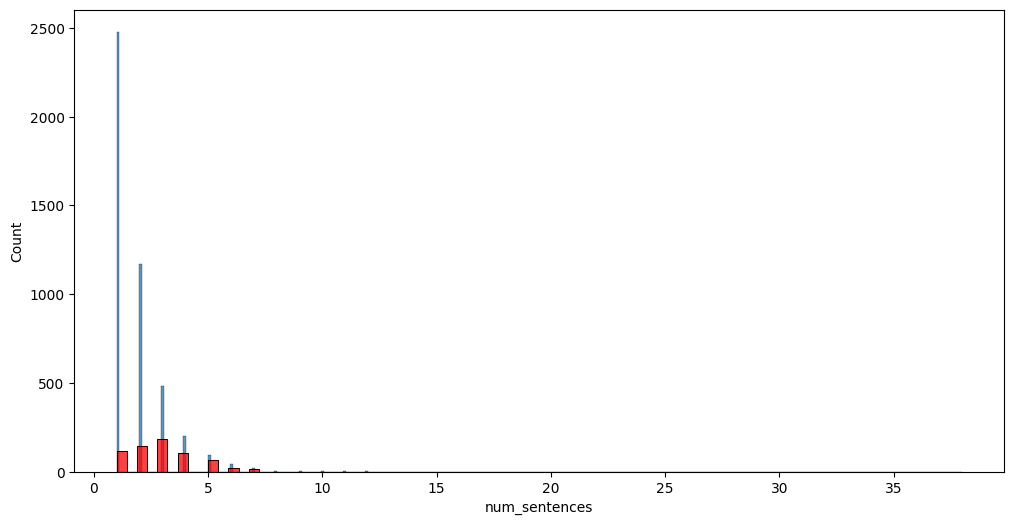

In [122]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'], label='ham')
sns.histplot(df[df['label'] == 1]['num_sentences'], color='red', label='spam')

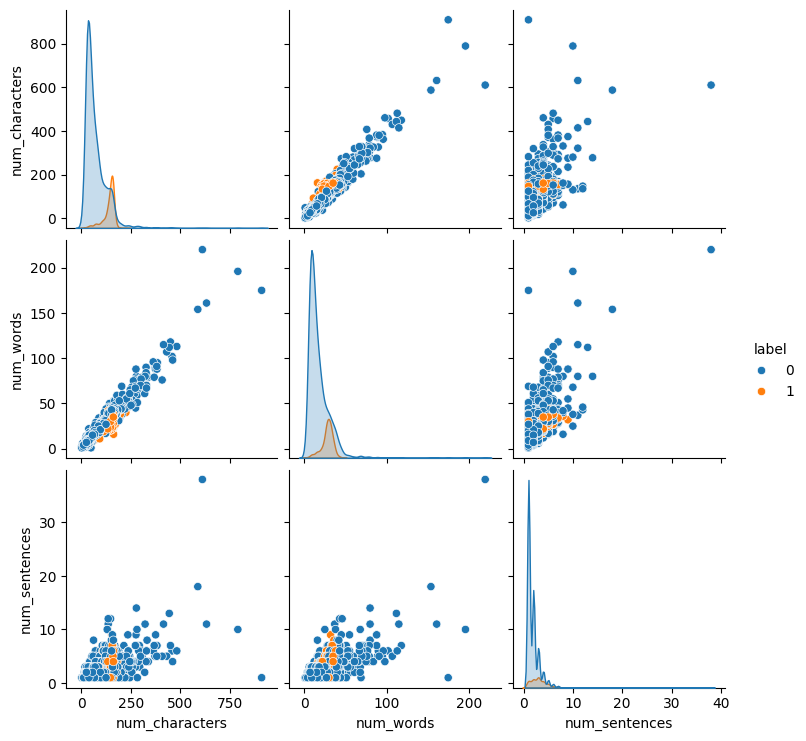

In [123]:
sns.pairplot(df, hue='label')

<Axes: >

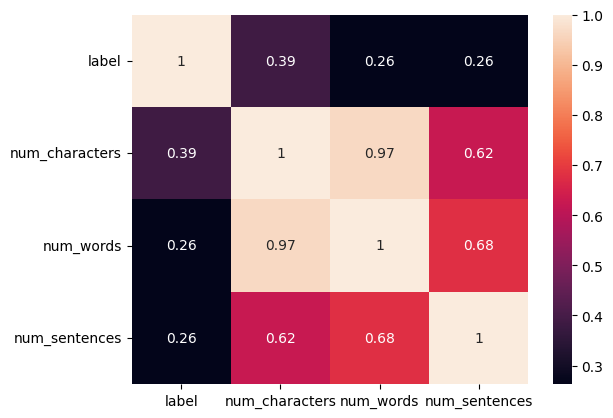

In [124]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

### 3. Data Preprocessing

In this step, we clean and prepare the text data for analysis and modeling. The main tasks include:

1. **Lowercasing**  
   Convert all text to lowercase to maintain uniformity and avoid treating the same word in different cases as different tokens.

2. **Tokenization**  
   Split the text into individual words or tokens using NLTK's `word_tokenize`.

3. **Removing Special Characters**  
   Remove characters such as `@`, `#`, `!`, etc., which do not contribute to the semantics of the text.

4. **Removing Stop Words and Punctuation**  
   Eliminate common stopwords (like "the", "is", "and") and punctuation which do not add much meaning.

5. **Stemming**  
   Reduce words to their root form using algorithms like Porter Stemmer (e.g., "running" becomes "run").

These preprocessing steps help simplify the text data and improve the performance of machine learning models.


In [146]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [147]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [149]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [150]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    temp=[]
    for i in text:
        if i.isalnum():
            temp.append(i)

    text = temp[:]
    temp.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    text = temp[:]
    temp.clear()
    for i in text:
        temp.append(ps.stem(i))
    return temp

In [152]:
# Test the transform_text function
transform_text('Hello, HOW ARE @ $ YOu ? nilesj@1234 and i loved dacing it make me happy.')

['hello', 'nilesj', '1234', 'love', 'dace', 'make', 'happi']

In [153]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df['tranfor_text'] = df['text'].apply(transform_text)

In [170]:
df.head()

,label,text,num_characters,num_words,num_sentences,tranfor_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [158]:
# %pip install wordcloud


In [180]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [181]:
df['tranfor_text'] = df['tranfor_text'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
df.head()

,label,text,num_characters,num_words,num_sentences,tranfor_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [182]:

# Step 2: Now generate word cloud from ham or spam
spam_wc = wc.generate(df[df['label']==1]['tranfor_text'].str.cat(sep=' '))

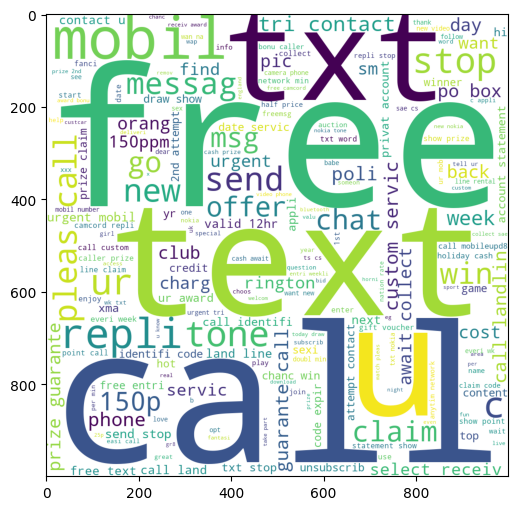

In [183]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [184]:
ham_wc = wc.generate(df[df['label']==0]['tranfor_text'].str.cat(sep=' '))

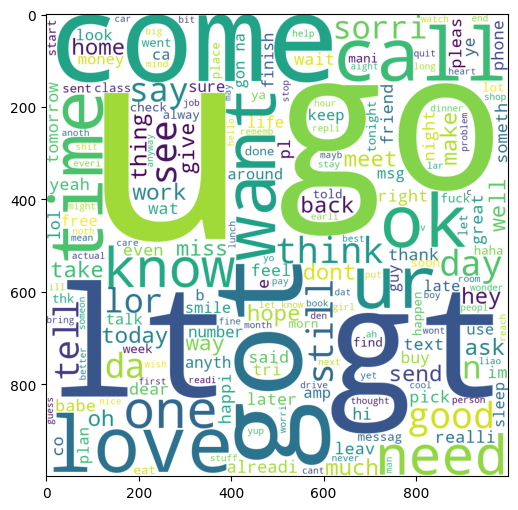

In [185]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

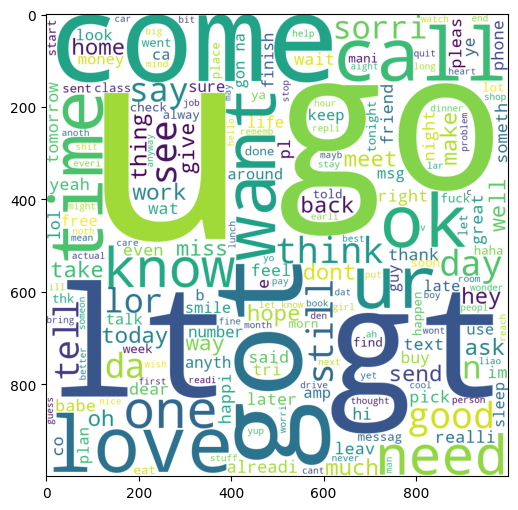

In [196]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [197]:
df.head()

,label,text,num_characters,num_words,num_sentences,tranfor_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


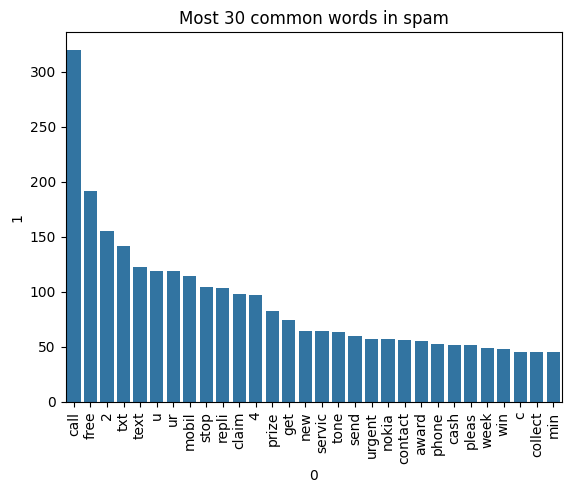

In [198]:
# most 30 word used in spam
spam_corps=[]
for msg in df[df['label']==1]['tranfor_text'].tolist():
    for word in msg.split():
        spam_corps.append(word)
from collections import Counter
counter = Counter(spam_corps)
# pd.DataFrame(counter.most_common(30))
sns.barplot(x=pd.DataFrame(counter.most_common(30))[0],y=pd.DataFrame(counter.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Most 30 common words in spam')
plt.show()

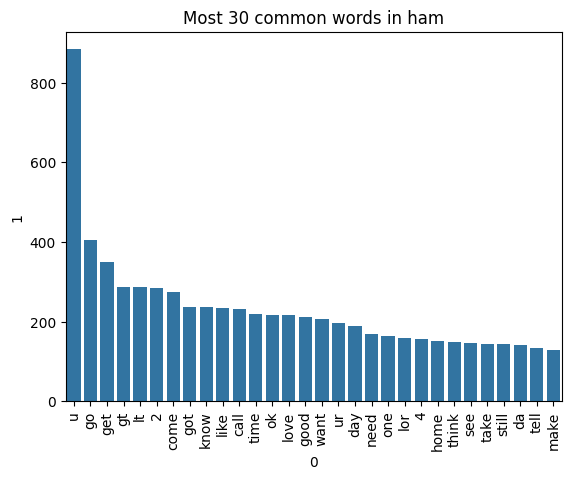

In [200]:
ham_corps=[]
for msg in df[df['label']==0]['tranfor_text'].tolist():
    for word in msg.split():
        ham_corps.append(word)
from collections import Counter
counter = Counter(ham_corps)
# pd.DataFrame(counter.most_common(30))
sns.barplot(x=pd.DataFrame(counter.most_common(30))[0],y=pd.DataFrame(counter.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title('Most 30 common words in ham')
plt.show()

In [202]:
len(ham_corps), len(spam_corps)

(35305, 9936)

### 4. Model Building

In [208]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
X=cv.fit_transform(df['tranfor_text']).toarray()

In [217]:
X.shape

(5169, 6674)

In [218]:
y = df['label'].values
y.shape

(5169,)

In [212]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [221]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
gnb= GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], shape=(1034,))

In [223]:
# Check the accuracy of the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [224]:
mnb= MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1034,))

In [225]:
# Check the accuracy of the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [226]:
bnb= BernoulliNB()
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], shape=(1034,))

In [228]:
# Check the accuracy of the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [230]:
tf = TfidfVectorizer()
X_axis= tf.fit_transform(df['tranfor_text']).toarray()

In [ ]:
X_axis.shape

In [234]:
y_axis = df['label'].values
y_axis.shape
y_axis

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_axis,y_axis,test_size=0.2, random_state=2)

gnb= GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], shape=(1034,))

In [237]:
# Check the accuracy of the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [238]:
mnb= MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1034,))

In [239]:
# Check the accuracy of the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [240]:
bnb= BernoulliNB()
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
y_pred
# Check the accuracy of the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [ ]:
# Tfidf with MultinomialNB is best model
# because it has high accuracy and precision